In [33]:
import numpy as np
import scipy as sp
import scipy.stats as spst
import matplotlib.pyplot as plt
import itertools
import math
import sys
import pandas as pd
import seaborn as sns

In [43]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [49]:
exec(open("/Users/yunfei/Desktop/master/AOS1/utils.py").read())

In [35]:
Xy = pd.read_csv("data/SynthPara_n1000_p2.csv", index_col=False)

In [37]:
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]

In [40]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [44]:
cls_skl_1 = SklearnLogisticRegression(max_iter=1000, solver='newton-cg', penalty='none')
cls_skl_2 = SklearnLogisticRegression(max_iter=1000, solver='newton-cg', penalty='l2')


In [45]:
cls_skl_1.fit(X, y)

pipe_skl = make_pipeline(poly, cls_skl_2)
pipe_skl.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

NameError: name 'add_decision_boundry' is not defined

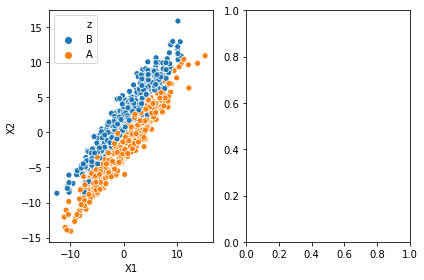

In [51]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy, ax=axs[0])
add_decision_boundry(cls_skl_1, label="SkPolyLR, noReg", ax=axs[0])
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy, ax=axs[1])
add_decision_boundry(cls_skl_2, label="SkPolyLR, Reg", ax=axs[1])